C:\Users\zpfh1\Desktop\AI_lab\095522039.wav loaded with sample_rate=44100, shape=torch.Size([1, 177152])


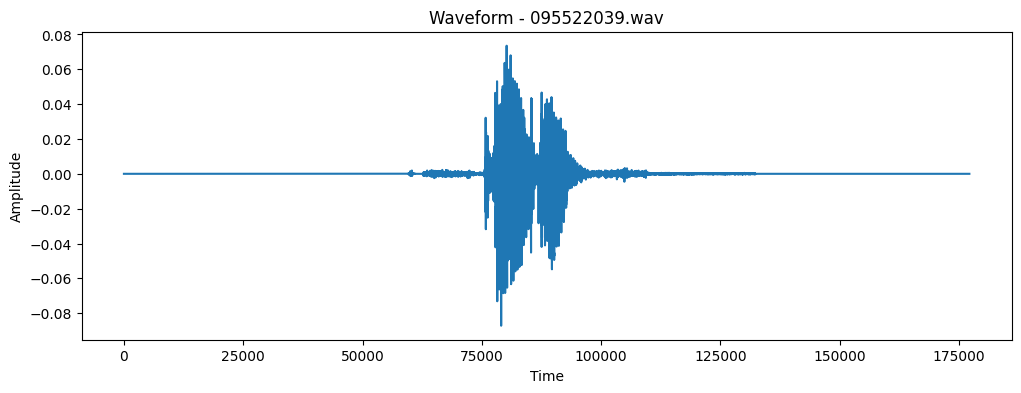

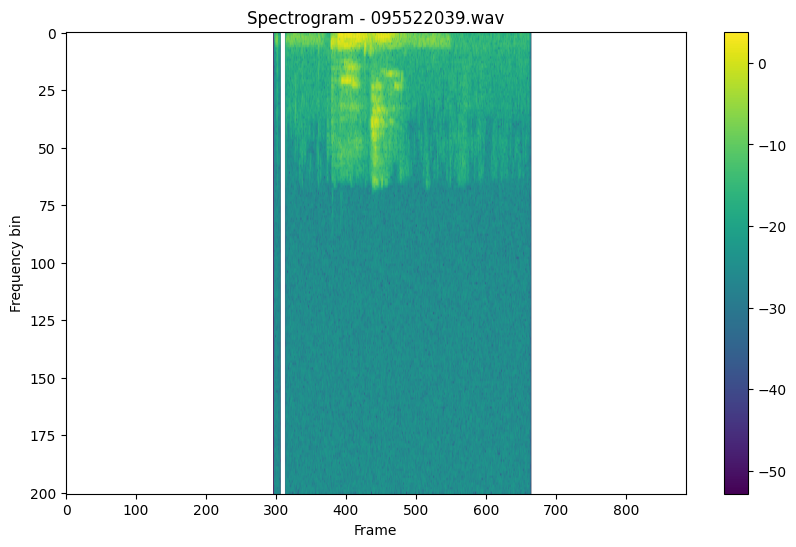

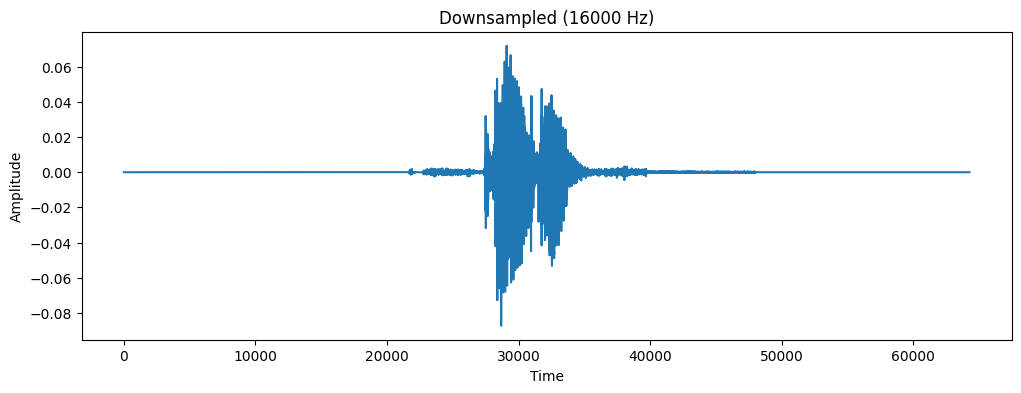

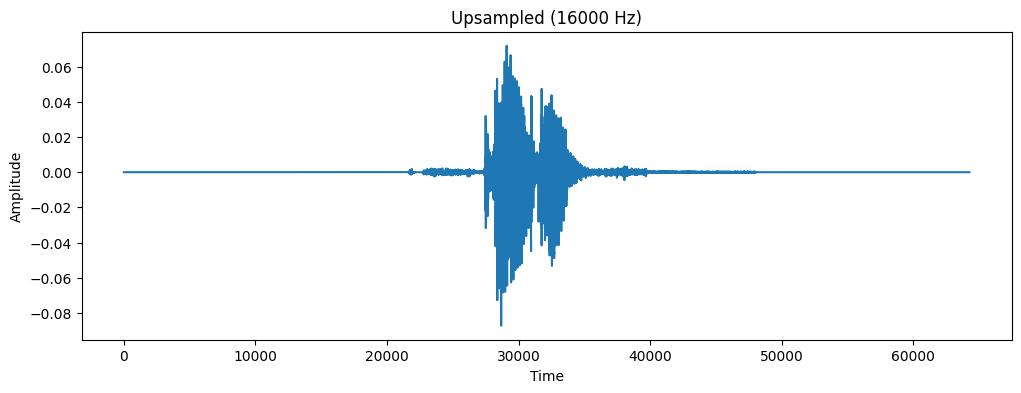

C:\Users\zpfh1\Desktop\AI_lab\095522040.wav loaded with sample_rate=44100, shape=torch.Size([1, 177152])


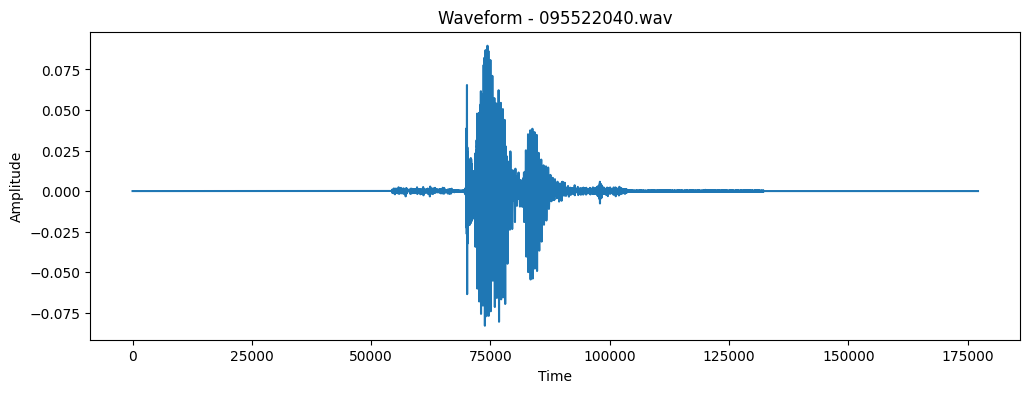

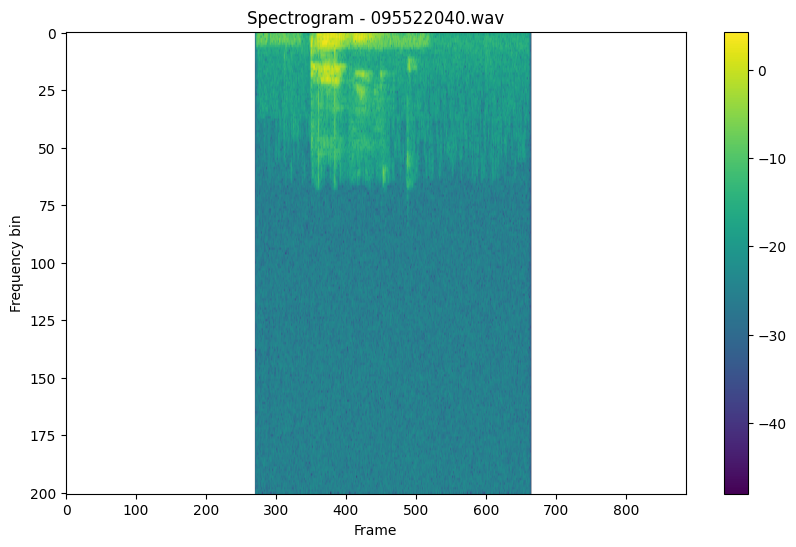

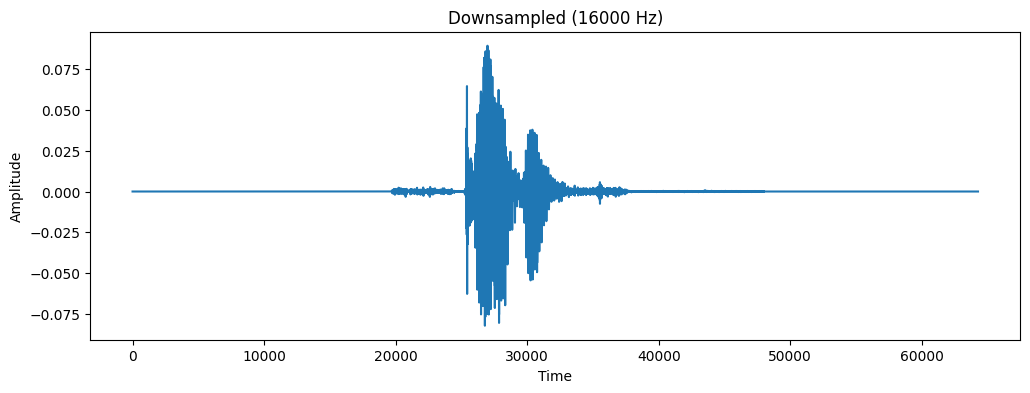

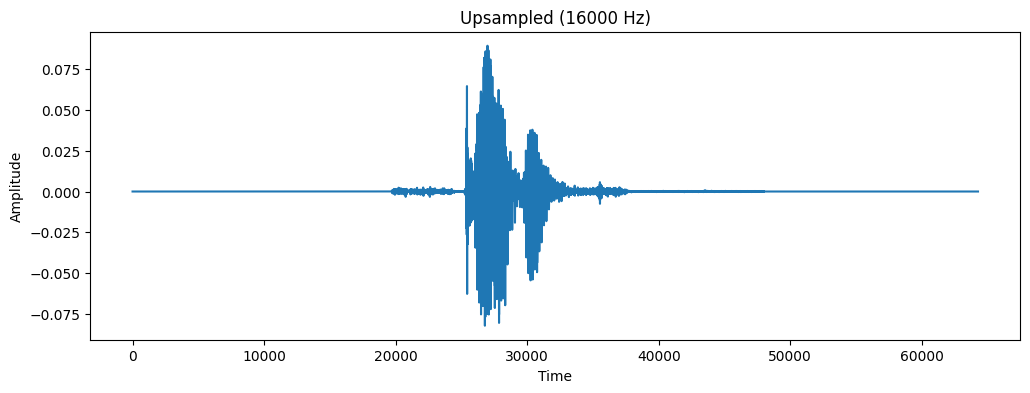

C:\Users\zpfh1\Desktop\AI_lab\095522041.wav loaded with sample_rate=44100, shape=torch.Size([1, 177152])


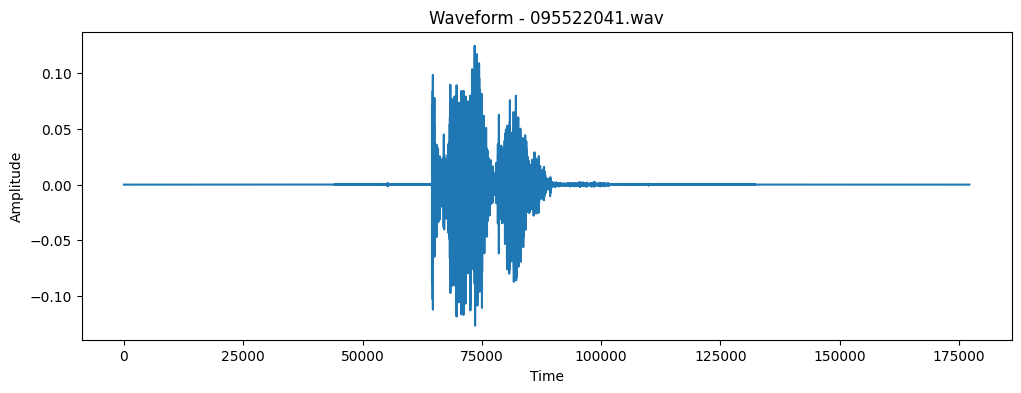

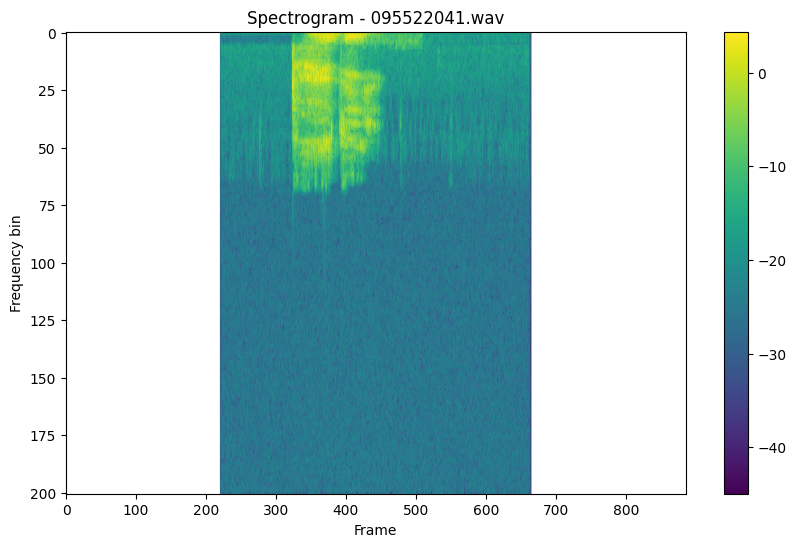

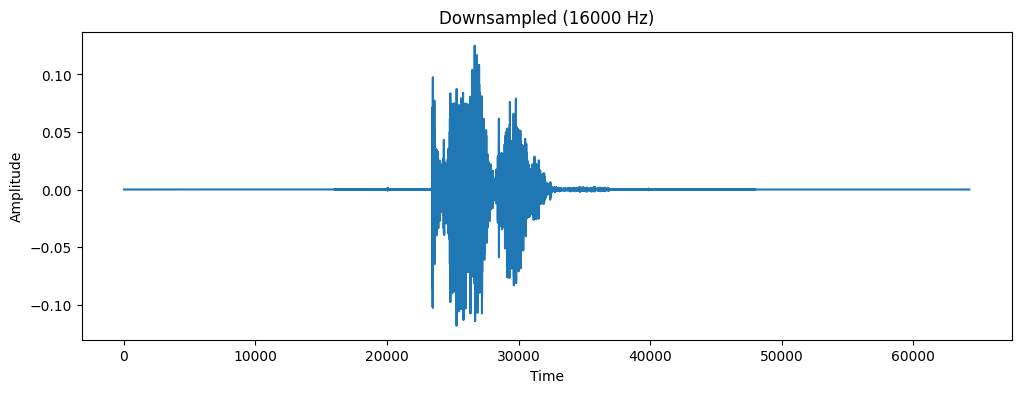

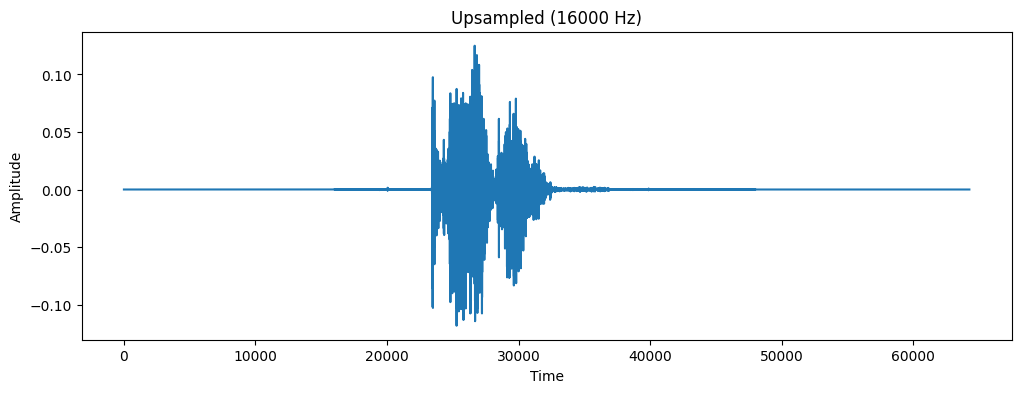

C:\Users\zpfh1\Desktop\AI_lab\095522042.wav loaded with sample_rate=44100, shape=torch.Size([1, 177152])


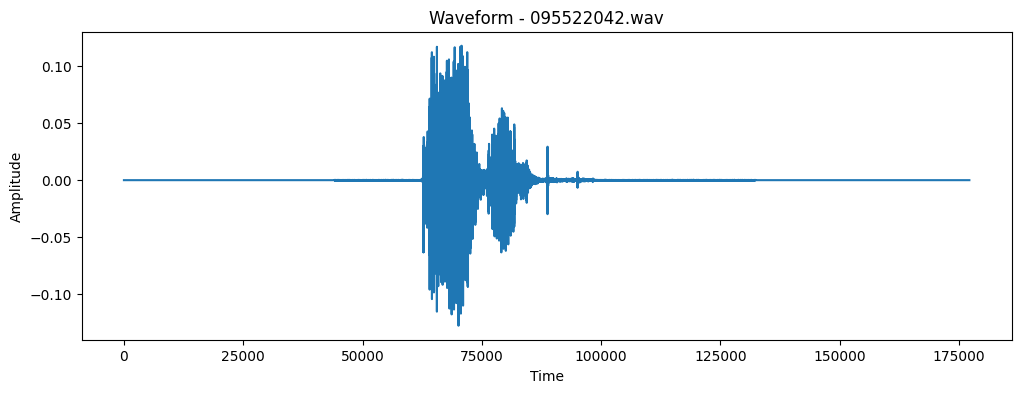

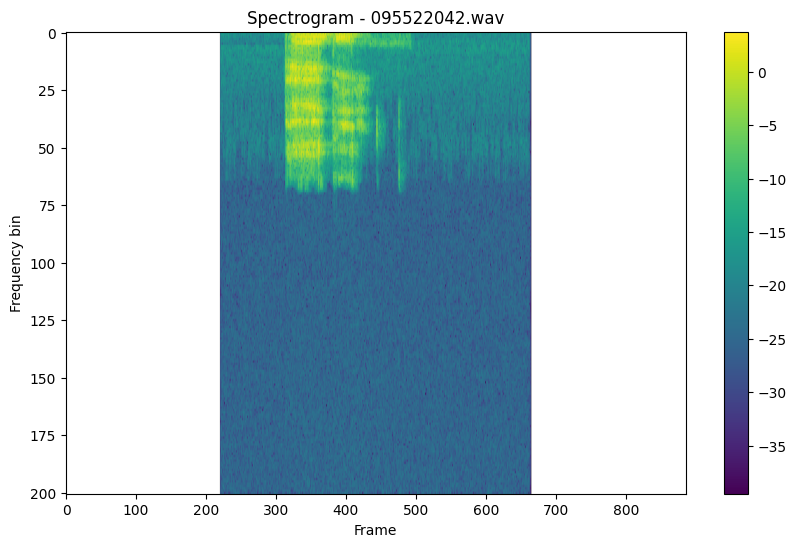

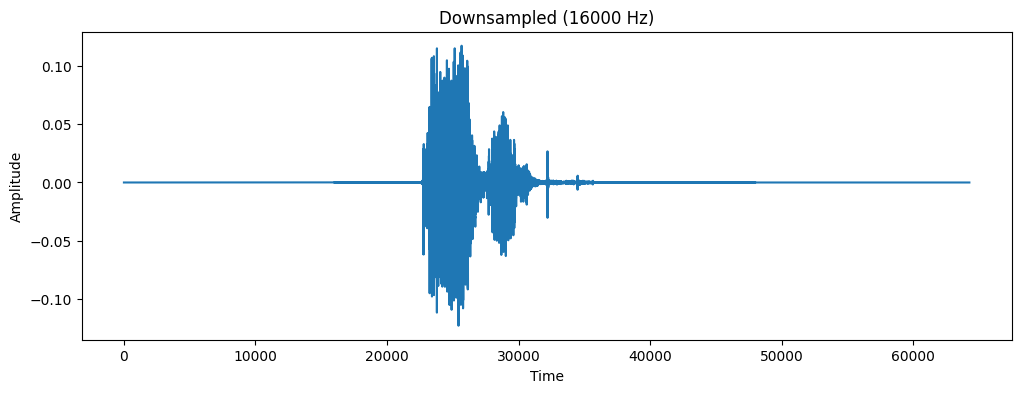

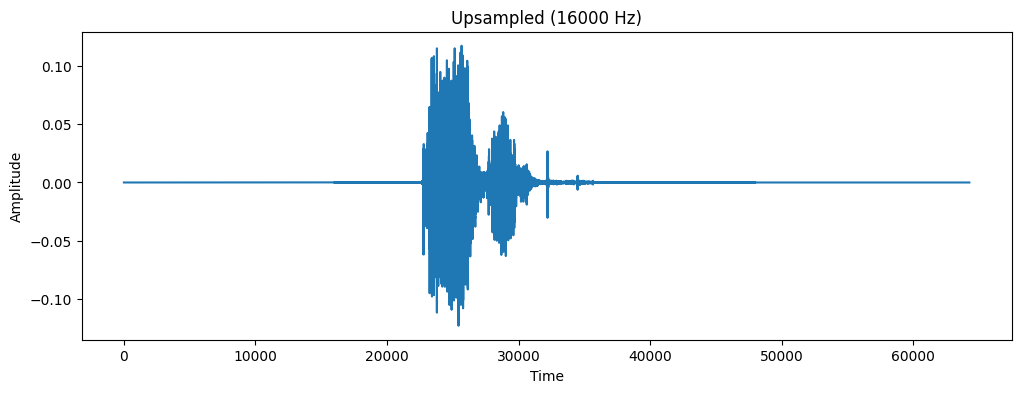

In [2]:
import torchaudio
import torchaudio.transforms as T
import matplotlib.pyplot as plt
from pydub import AudioSegment
import os

# 샘플 데이터 파일 4개 경로
m4a_files = [
    r"C:\Users\zpfh1\Desktop\AI_lab\095522039.m4a",
    r"C:\Users\zpfh1\Desktop\AI_lab\095522040.m4a",
    r"C:\Users\zpfh1\Desktop\AI_lab\095522041.m4a",
    r"C:\Users\zpfh1\Desktop\AI_lab\095522042.m4a",
]

# 변환 후 wav 저장할 폴더
output_dir = r"C:\Users\zpfh1\Desktop\AI_lab"
os.makedirs(output_dir, exist_ok=True)

#  m4a → wav 변환
def convert_m4a_to_wav(m4a_path):
    filename = os.path.basename(m4a_path).replace(".m4a", ".wav")
    wav_path = os.path.join(output_dir, filename)
    audio = AudioSegment.from_file(m4a_path, format="m4a")
    audio.export(wav_path, format="wav")
    return wav_path

# waveform + spectrogram 출력
def plot_waveform_and_spec(waveform, sample_rate, title):
    plt.figure(figsize=(12, 4))
    plt.plot(waveform.t().numpy())
    plt.title(f"Waveform - {title}")
    plt.xlabel("Time")
    plt.ylabel("Amplitude")
    plt.show()

    spectrogram = torchaudio.transforms.Spectrogram()(waveform)
    plt.figure(figsize=(10, 6))
    plt.imshow(spectrogram.log2()[0, :, :].numpy(), cmap="viridis", aspect="auto")
    plt.title(f"Spectrogram - {title}")
    plt.xlabel("Frame")
    plt.ylabel("Frequency bin")
    plt.colorbar()
    plt.show()

# 리샘플링 (다운/업샘플링)
def resample_and_plot(waveform, sample_rate, new_rate, title):
    resampler = T.Resample(orig_freq=sample_rate, new_freq=new_rate)
    resampled = resampler(waveform)

    plt.figure(figsize=(12, 4))
    plt.plot(resampled.t().numpy())
    plt.title(f"{title} ({new_rate} Hz)")
    plt.xlabel("Time")
    plt.ylabel("Amplitude")
    plt.show()

    return resampled

# 메인 루프
for m4a_file in m4a_files:
    #  변환
    wav_file = convert_m4a_to_wav(m4a_file)

    # 불러오기
    waveform, sample_rate = torchaudio.load(wav_file)
    print(f"{wav_file} loaded with sample_rate={sample_rate}, shape={waveform.shape}")

    # 원본 waveform + spectrogram
    plot_waveform_and_spec(waveform, sample_rate, title=os.path.basename(wav_file))

    # Downsampling (예: 16kHz)
    down_wave = resample_and_plot(waveform, sample_rate, 16000, title="Downsampled")

    # Upsampling (예: 16kHz)
    up_wave = resample_and_plot(waveform, sample_rate, 16000, title="Upsampled")
